# Project: Public Perception of AI by Team Hadoop

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#sentiment">Sentiment Analysis</a></li>
<li><a href="#model">Hypothesis testing and Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

It is undeniable that Artificial Intelligence is one of the most rapidly developing fields in computer science, and with all of its connotations and implications, the public's view of Artificial Intelligence is extremely important.

Is Artificial Intelligence dangerous? Will it destroy humanity? Will it send humanity into a golden age? These are all questions that people tend to think about when they hear the word 'AI', and the answers to these questions are currently unknown. What is known is that all of these questions have yes as a possible answer. AI could destroy humanity, and AI could save humanity. 

AI could also fizzle out and reveal itself to be an impossible problem to solve. At the moment, it’s impossible to say what will happen, but at best, it’s mysterious. The problem of AI carries numerous important questions that touch on some of the most important questions for a person, most notably, what even constitutes consciousness? With these implications, it’s no wonder AI has captured the public interest.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set the plot style to ggplot
plt.style.use('ggplot')
import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
# <a id='wrangling'></a>
## Data Wrangling

<a id='wrangling'></a>
## Data Wrangling

In [134]:
df = pd.read_csv('data/ai-perception.csv')

In [135]:
# df = pd.read_csv('robot-ai-all-public.csv')
cols = df.columns
# print column names on one line
print("'" + "', '".join(cols) + "'")

'Article ID', 'Article Date', 'Paragraph number', 'NYT section', 'Paragraph', 'Title', 'WorkTimeInSeconds', 'AI Mood', 'AI Relevance', 'Fiction', 'Controling AI (negative)', 'Cyborg (negative)', 'Ethics (negative)', 'Military (negative)', 'Progress (negative)', 'Singularity (negative)', 'Work (negative)', 'Other (negative)', 'Cyborg (positive)', 'Decisions (positive)', 'Education (positive)', 'Entertain (positive)', 'Healthcare (positive)', 'Singularity (positive)', 'Transportation (positive)', 'Work (positive)', 'Other (positive)'


In [5]:
df.head()

,Article ID,Article Date,Paragraph number,NYT section,Paragraph,Title,WorkTimeInSeconds,AI Mood,AI Relevance,Fiction,...,Other (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Other (positive)
0,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,1472,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
1,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,49,4,5,0,...,{},0,0,0,0,0,0,0,0,{}
2,4fd1cbc98eb7c8105d701286,1996-10-06 00:00:00 UTC,18,New York and Region,"Thus, next weekend will feature the robot who ...",LONG ISLAND JOURNAL,66,5,5,0,...,{},0,0,0,1,0,0,0,0,{}
3,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,3053,3,4,0,...,{},0,0,0,0,0,0,0,0,{}
4,54b0793b7988100e21965770,2006-07-31 00:00:00 UTC,16,Technology,That phrase was coined in the 1970۪s by Masahi...,Camera System Creates Sophisticated 3-D Effects,25,3,4,0,...,{},0,0,0,0,0,0,0,0,{}


In [6]:
df.describe()

,WorkTimeInSeconds,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),Singularity (negative),Work (negative),Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive)
count,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000,17073.000000
mean,344.593510,3.266620,3.847596,0.078018,0.024015,0.003924,0.007556,0.013120,0.025655,0.008610,0.014174,0.011773,0.041469,0.020032,0.048615,0.028115,0.007907,0.036022,0.049376
std,449.418006,0.809979,1.255154,0.268208,0.153099,0.062523,0.086598,0.113793,0.158107,0.092393,0.118213,0.107866,0.199378,0.140112,0.215068,0.165305,0.088573,0.186350,0.216659
min,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,462.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3521.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(17073, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17073 entries, 0 to 17072
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Article ID                 17073 non-null  object
 1   Article Date               9129 non-null   object
 2   Paragraph number           17073 non-null  object
 3   NYT section                17061 non-null  object
 4   Paragraph                  17061 non-null  object
 5   Title                      17070 non-null  object
 6   WorkTimeInSeconds          17073 non-null  int64 
 7   AI Mood                    17073 non-null  int64 
 8   AI Relevance               17073 non-null  int64 
 9   Fiction                    17073 non-null  int64 
 10  Controling AI (negative)   17073 non-null  int64 
 11  Cyborg (negative)          17073 non-null  int64 
 12  Ethics (negative)          17073 non-null  int64 
 13  Military (negative)        17073 non-null  int64 
 14  Progre

This dataset is organized so that it gives us the date of the article, the NYT section, the general AI Mood and the AI Relevance. It also tells us whether it has a positive or negative mood about AI (using a 5 point scale with 3 being neutral, 5 being very positive, 1 being very negative) and how related the article is to AI (again, using a 5-point scale). We are also given a binary indicator in the dataset telling us whether or not the article includes fictional examples of AI (Fiction).

Then, for each article, the dataset gives a binary indicator of if there is negative or positive sentiment for each of the following categories: Merging of human and AI (Cyborg), Ethics in AI (Ethics), Military applications (Military), Societal Progress using AI (Progress), the AI Singularity (Singularity), and how AI will affect Work (Work). These categories are what we will use to measure not only the general sentiment of AI, but also to try to do some prediction of the trends of AI into the future.

There is also some metadata included that we will remove, for it is not relevant in our analysis.

Let's start cleaning up the dataset. From the first 7 columns, we remove everything except for date and NYT Section, because those columns are not important. We also can drop the 'other' categories for positive and negative viewpoints on AI, because we will not use those in this analysis.

### Checking for Quality issues

1.  Check duplicates values and drop if any found

In [9]:
print(df.duplicated().any())

True


2. Check for rows where all values are null 

In [10]:
df.isnull().sum()

Article ID                      0
Article Date                 7944
Paragraph number                0
NYT section                    12
Paragraph                      12
Title                           3
WorkTimeInSeconds               0
AI Mood                         0
AI Relevance                    0
Fiction                         0
Controling AI (negative)        0
Cyborg (negative)               0
Ethics (negative)               0
Military (negative)             0
Progress (negative)             0
Singularity (negative)          0
Work (negative)                 0
Other (negative)                0
Cyborg (positive)               0
Decisions (positive)            0
Education (positive)            0
Entertain (positive)            0
Healthcare (positive)           0
Singularity (positive)          0
Transportation (positive)       0
Work (positive)                 0
Other (positive)                0
dtype: int64

3. Handle DateTime Column 

In [11]:
df['Article Date'].dtype

dtype('O')

### Cleaning the quality issues

In [12]:
# Make copy of original piece of data
df_copy = df.copy()

In [13]:
# drop duplicates
df_copy=df.drop_duplicates()
print(df_copy.duplicated().any())
df_copy.shape

False


(17068, 27)

In [14]:
# Drop rows that have all null values
df_copy = df.dropna(how='all', axis=0)

In [15]:
# Drop columns that are not useful
df_copy = df.drop(columns=['Article ID', 'Paragraph number', 'Paragraph', 'Title', 'WorkTimeInSeconds',
                     'Other (negative)', 'Other (positive)'])

Next, we will convert the Article Date into a DateTime object and also make a new column that stores just the year the article was published.

### Feature Engineering

In [16]:
dates = []
years = []

# What we will do is simply go through every single date and check if it is a date, or if it is some sort of an empty slot
# or undecipherable piece of data. We will split it by spaces to remove the UTC and split the string by dashes to separate
# the day, month, and year.
for i in df_copy.iterrows():
    new_date = list(i)[1][0]
    
    # Some empty dates were stored as floats. If we get a date that is a float, we will store it as an 'empty' date, which i
    # designated by the date 1/1/1
    if isinstance(new_date, float):
        new_datetime = datetime.date(1, 1, 1)
        year = 1
    else:
        new_date = new_date.split(" ")
        new_date = new_date[0].split("-")
        
        # If there are three values left over after the splitting, we have a day, month, and year, so we create the datetime
        if len(new_date) == 3:
            new_datetime = datetime.date(int(new_date[0]), int(new_date[1]), int(new_date[2]))
            year = int(new_date[0])
        else:
            #If there is a problem, we just create an empty date as described before.
            new_datetime = datetime.date(1, 1, 1)
            year = 1
    
    #Here we simply append to the 2 new columns we are creating
    dates.append(new_datetime)
    years.append(year)

# Now we finally append our new columns to the DataFrame
df_copy["Date"] = dates
df_copy["Year"] = years

We would also like to remove all of the articles that don't have a date attached to them. In the previous code where we converted the date to DateTime objects, the dates were simply encoded these as 1/1/1, which is very easy to check for. So now we create a new dataset that only includes articles with dates.

In [17]:
new_df = []

for i in df_copy.iterrows():
    date = list(i)[1][20]
    
    # The year is only 1 if there was no date, so we include this article if the date didn't have a year of 1
    if date.year != 1:
        new_df.append(list(i)[1])

df_copy = pd.DataFrame(new_df)

In [18]:
df_copy.head(2)

,Article Date,NYT section,AI Mood,AI Relevance,Fiction,Controling AI (negative),Cyborg (negative),Ethics (negative),Military (negative),Progress (negative),...,Cyborg (positive),Decisions (positive),Education (positive),Entertain (positive),Healthcare (positive),Singularity (positive),Transportation (positive),Work (positive),Date,Year
0,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996
1,1996-10-06 00:00:00 UTC,New York and Region,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996-10-06,1996


<a id='eda'></a>
## Exploratory Data Analysis

First, we will do a basic graph of the general sentiment on AI over time in a scatterplot. Since there are so many datapoints, we will only graph a random sample size of the data.

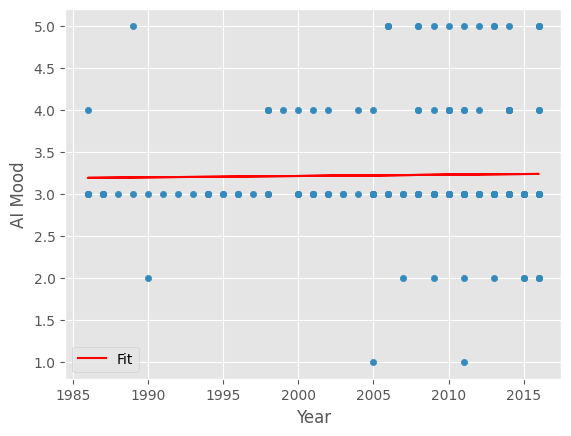

In [19]:
# This function samples the dataset so that our graph isn't just full of datapoints to the point of being unreadable
sampled_df = df_copy.sample(200,random_state=1)

# Numpy comes with a polyfit function that we will use for our graph
pfit = np.polyfit(sampled_df['Year'], sampled_df['AI Mood'], 1)   
func = np.poly1d(pfit)

sampled_df.insert(21, "Fit", func(sampled_df["Year"]))

# Now we just plot the datapoints and the linear regression we just did
plt = sampled_df.plot.scatter(x = "Year", y = "AI Mood")
sampled_df.plot(x = "Year", y = "Fit", color = "Red", ax=plt);

There is a slight trend downwards in the general opinion on AI, but it does remain slightly above three, which means it stays positive. However, there do also seem to be quite a lot of neutral articles that have been written, which may be polluting our data, so lets try only graphing articles that have either a positive or a negative view on AI (i.e only articles with an AI Mood of 1, 2, 4 or 5).

In [20]:
temp_data = []

# Here we simply loop through and only add articles with moods not equaling three to our dataset.
for i in df_copy.iterrows():
    mood = list(i)[1][2]
    
    if mood != 3:
        temp_data.append(list(i)[1])
    
#Then we convert it to a dataframe
test_df = pd.DataFrame(temp_data)

Now we will run the analysis again to see if we get a different result.

<Axes: xlabel='Year', ylabel='AI Mood'>

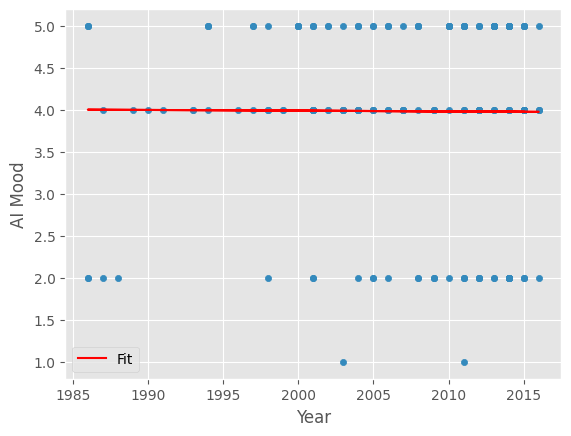

In [21]:
# This function samples the dataset so that our graph isn't just full of datapoints to the point of being unreadable
sampled_df = test_df.sample(200,random_state=1)

# Numpy comes with a polyfit function that we will use for our graph
pfit = np.polyfit(sampled_df['Year'], sampled_df['AI Mood'], 1)
func = np.poly1d(pfit)

sampled_df.insert(21, "Fit", func(sampled_df["Year"]))

# Now we just plot the datapoints and the linear regression we just did
plt = sampled_df.plot.scatter(x = "Year", y = "AI Mood")
sampled_df.plot(x = "Year", y = "Fit", color = "Red", ax=plt)

As we can see, if we remove all of the neutral articles, then the trend becomes a little bit more clear. Not only are articles generally positive around the 90's, but the trend downwards as we get closer to modern day is pronounced.

Of course, linear regression is not the only method of analysis we can do, and one thing that we may notice in this graph is that it seems based on an eye test that there are more 1 and 2 level articles in 2005 and onwards compared to before, so even if the average hasn't decreased that much, perhaps there is more extreme negativity in general.

So, for the next graph we will graph the number of 1 Mood Negative Articles per year, and the number of 1 Mood Positive Articles per year in an attempt to see if, despite growing optimism about AI, there is also more fear.

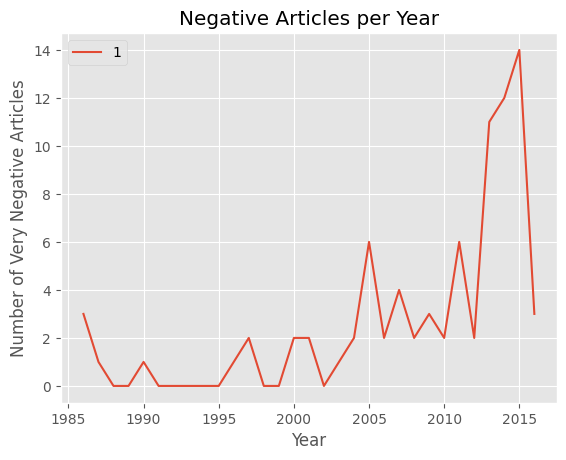

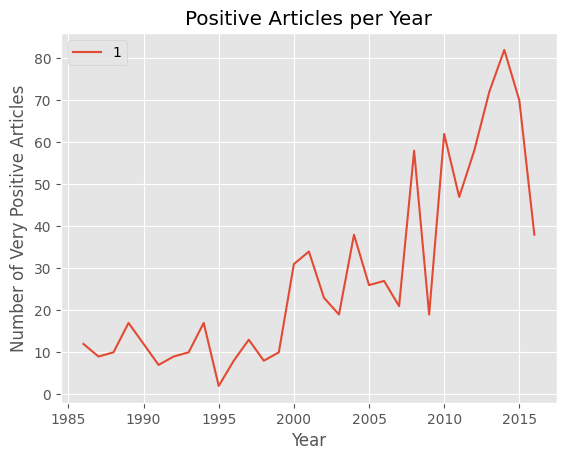

In [22]:
# Here we create arrays to store the number of ones and fives each year
num_of_ones = np.zeros(31)
num_of_fives = np.zeros(31)

# Now we will loop through the dataset and count up the number of ones and fives
for i in df_copy.iterrows():
    mood = list(i)[1][2]
    
    # Here we subtract 1986 from the list since the first year is 1986, meaning that the year 1986 maps to the index of
    # 0 in our temporary arrays
    if mood == 1:
        num_of_ones[list(i)[1][21] - 1986] = num_of_ones[list(i)[1][21] - 1986] + 1
    elif mood == 5:
        num_of_fives[list(i)[1][21] - 1986] = num_of_fives[list(i)[1][21] - 1986] + 1
        
new_df_ones = []
new_df_fives = []
y = 1986

# Now we convert our arrays to two dimensional arrays that have the year stored so that our graphs are easier to understand
for i in num_of_ones:
    new_df_ones.append([y, i])
    
    y += 1

y = 1986

for i in num_of_fives:
    new_df_fives.append([y, i])
    
    y += 1

# And finally we graph our results
test_df_ones = pd.DataFrame(new_df_ones)
test_df_ones.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Negative Articles", title = "Negative Articles per Year")

test_df_fives = pd.DataFrame(new_df_fives)
test_df_fives.plot(x = 0, y = 1, xlabel = "Year", ylabel = "Number of Very Positive Articles", title = "Positive Articles per Year");


So as we can see, for both positive and negative articles, the number increased substantially, which is not surprising. However, one interesting phenomenon is how around the year 2000 is when the number of positive articles abruptly increased, while only in the year 2005 did the number of negative articles increase. This fits the idea that with all of the positive hope about AI comes a delayed sense of foreboding about its future. It seems like for a while, there is lots of talk about the positives, but it takes some time for people to realize the negatives of AI. Also something noteworthy is that, from 2012 to 2015, there was an extremely intense increase in negative articles, much moreso than positive articles. This could mean that negativity is increasing at a much faster rate in recent years compared to positivity.



In [23]:
# print type of df_copy["Year"]
# print(type(df_copy["Year"][0]))
# print column dtypes of df_copy
# print(df_copy.dtypes, '\n')

# 'Date' column is of type object (datetime.date)
print(type(df_copy["Date"][0]))
# Remove 'Date' column for aggregation
df_copy.drop(columns=['Date'], inplace=True)

<class 'datetime.date'>


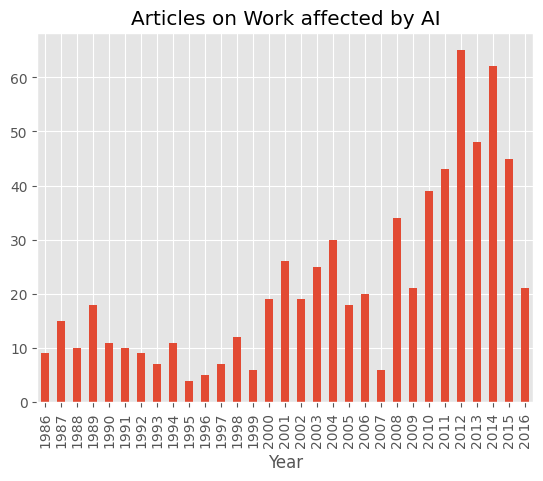

In [32]:
# First we group the data by year, and sum all the values up.
# df_copy['Year'] = 
df_year = df_copy.groupby(['Year']).sum()

# Then we  go through and store the newly summed up columns in a series of different arrays, one for each topic.
Cyborg = df_year["Cyborg (negative)"] + df_year["Cyborg (positive)"]
Ethics = df_year["Ethics (negative)"]
Military = df_year["Military (negative)"]
Education = df_year["Education (positive)"]
Entertain = df_year["Entertain (positive)"]
Healthcare = df_year["Healthcare (positive)"]
Singularity = df_year["Singularity (negative)"] + df_year["Singularity (positive)"]
Transportation = df_year["Transportation (positive)"]
Progress = df_year["Progress (negative)"]
Decisions = df_year["Decisions (positive)"]
ControlingAI = df_year["Controling AI (negative)"]
Work = df_year["Work (negative)"] + df_year["Work (positive)"]

# Here we plot each of the topics we just summed up one by one so we can see their popularity year by year
work = Work.plot.bar(title = "Articles on Work affected by AI");
fig = work.get_figure()
# save plot to file in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/work.png', bbox_inches='tight')

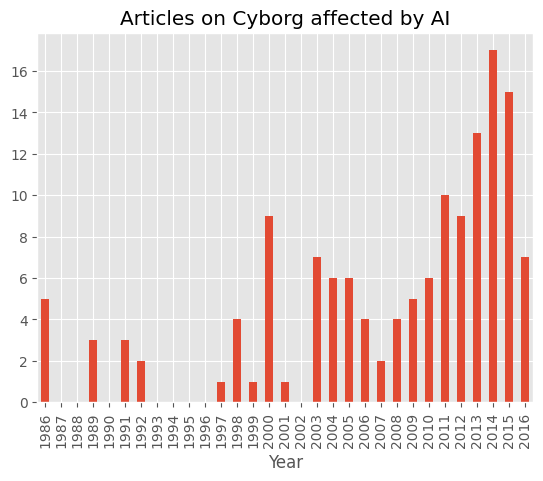

In [28]:
cyborg = Cyborg.plot.bar(title = "Articles on Cyborg affected by AI");
fig = cyborg.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/cyborg.png', bbox_inches='tight')

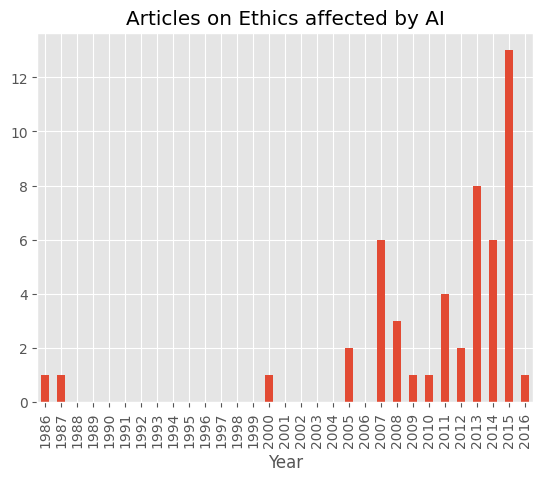

In [33]:
ethics = Ethics.plot.bar(title = "Articles on Ethics affected by AI");
fig = ethics.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/ethics.png', bbox_inches='tight')

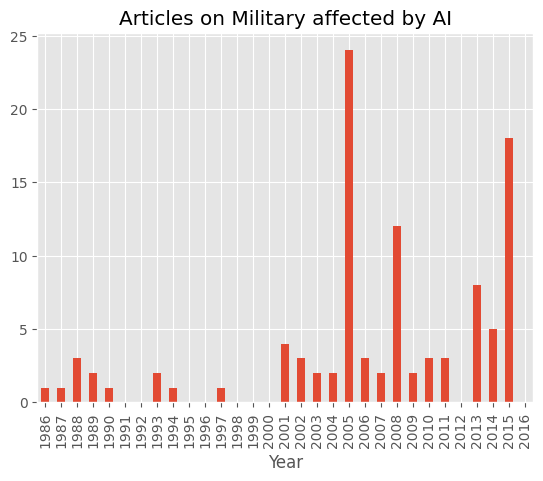

In [34]:
military = Military.plot.bar(title = "Articles on Military affected by AI");
fig = military.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/military.png', bbox_inches='tight')

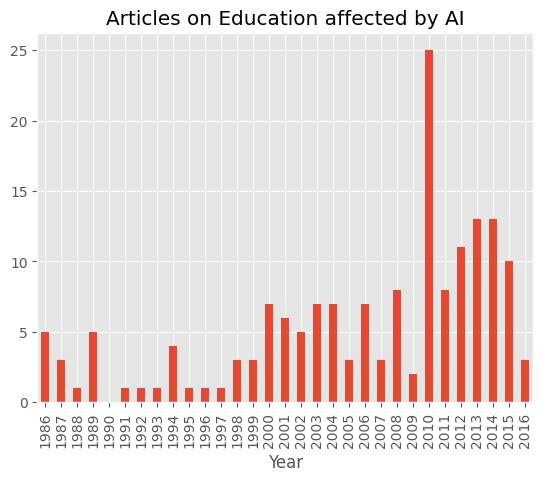

In [30]:
education = Education.plot.bar(title = "Articles on Education affected by AI");
fig = education.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/education.png', bbox_inches='tight')

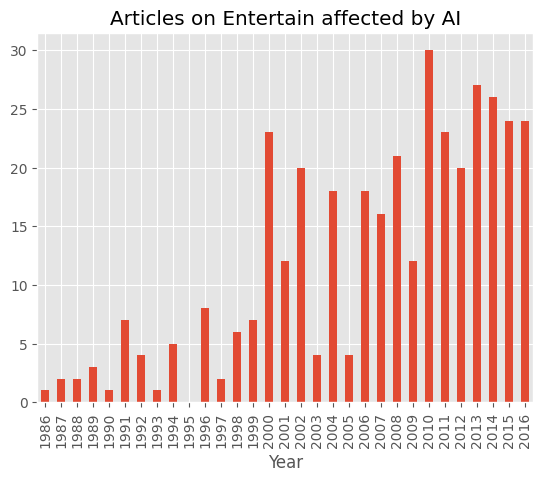

In [31]:
entertain = Entertain.plot.bar(title = "Articles on Entertain affected by AI");
fig = entertain.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/entertain.png', bbox_inches='tight')

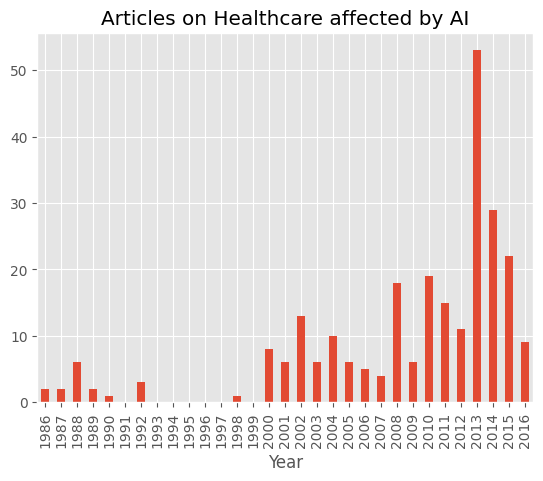

In [35]:
healthcare = Healthcare.plot.bar(title = "Articles on Healthcare affected by AI");
fig = healthcare.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/healthcare.png', bbox_inches='tight')

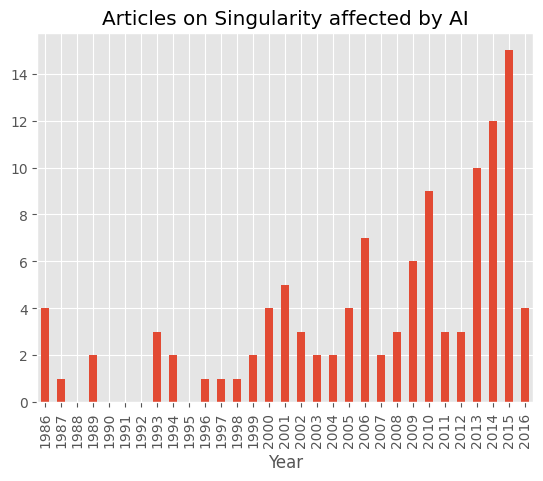

In [36]:
singularity = Singularity.plot.bar(title = "Articles on Singularity affected by AI");
fig = singularity.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/singularity.png', bbox_inches='tight')

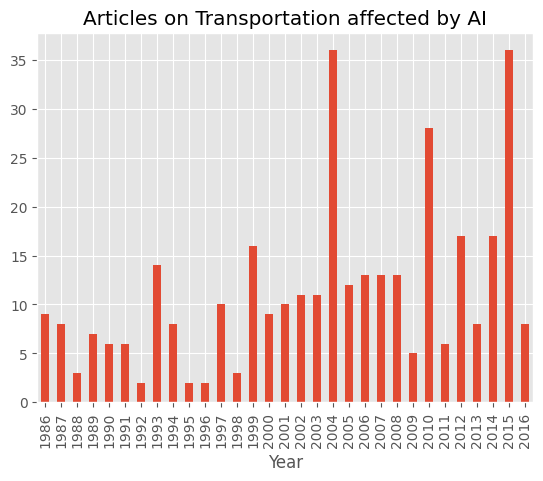

In [37]:
transportation = Transportation.plot.bar(title = "Articles on Transportation affected by AI");
fig = transportation.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/transportation.png', bbox_inches='tight')

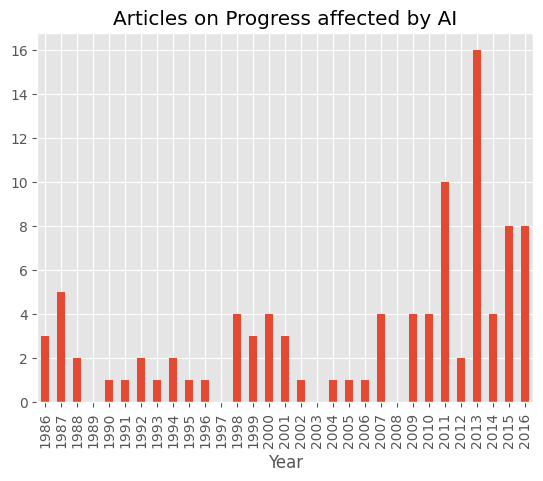

In [38]:
progress = Progress.plot.bar(title = "Articles on Progress affected by AI");
fig = progress.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/progress.png', bbox_inches='tight')

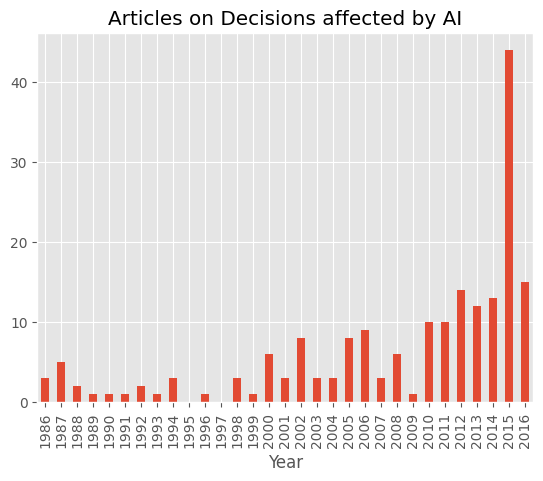

In [39]:
decisions = Decisions.plot.bar(title = "Articles on Decisions affected by AI");
fig = decisions.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/decisions.png', bbox_inches='tight')

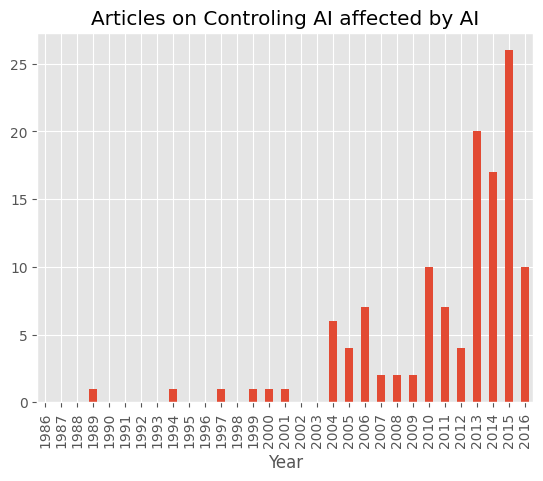

In [40]:
controlling = ControlingAI.plot.bar(title = "Articles on Controling AI affected by AI");
fig = controlling.get_figure()
# save plot in 'fig/sentiment-over-time' folder
fig.savefig('fig/sentiment-over-time/controlling.png', bbox_inches='tight')

From the above graphs, we can see that nearly every single topic has had an increase. The only exception seems to be transportation, which has some big peaks but on average looks to only be slightly increasing. Some interesting things are revealed by looking at these graphs. For example, ethics in AI was essentially not talked about at all until 2007 or so, meaning that it was never really considered until recently. Fears of AI use in the military seemed to peak around 2005 but has actually dropped a little since then. Healthcare is another sector that seemingly wasn't really considered much at all until around 2000. What is perhaps not much of a surprise is how the effect of AI on work is the most popular topic, and its not a wonder why. Many of the other issues are a lot more abstract and, for the most part, can be far away from the average person. However, someone's livelihood is much closer to home, and the increasingly generalized problem solving capabilities of AI are leading more and more people to a very grounded and easy to understand fear, "Will my job become automated?" It's no wonder its the most popular topic.

<a id='sentiment'></a>
## Sentiment Analysis

In [41]:
# import necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /home/wpm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wpm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Next, we can preprocess the paragraph column from the original dataframe

In [42]:
def preprocessing(text):
    text = re.sub("[^-9A-Za-z ]", "", text).lower()
    text= re.sub("[^\w\s]"," ", text)
    stop = stopwords.words("english")
    tokens = [word for word in (token for token in word_tokenize(text)) if word not in stop]
    #lemmatizer = nltk.WordNetLemmatizer()
    #preprocessed_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])
    preprocessed_text = ' '.join([word for word in tokens])
    return preprocessed_text

In [43]:
df['Paragraph'] = df['Paragraph'].astype(str)
df['cleaned_paragraph'] = df['Paragraph'].apply(preprocessing)

In [44]:
def get_paragraph_polarity(paragraph):
  """
        Utility function to classify sentiment of passed paragraph
        using textblob's sentiment method
  """
  return TextBlob(paragraph).sentiment.polarity


def get_sentiment_textblob(text):
    if text > 0:                
        return"Positive"
    elif text == 0:
        return"Neutral"
    else:
        return"Negative"

In [45]:
# create a new column called 'polarity' & 'sentiment' by applying 'get paragraph polarity' & 'get sentiment textblob' 
#function to the 'cleaned paragraph’ & 'polarity' column.

df['polarity']=df['cleaned_paragraph'].apply(get_paragraph_polarity)
df['Sentiment']=df['polarity'].apply(get_sentiment_textblob)

In [46]:
#create a function to calculate the total and percentage of sentiments

def sentiment_count(data, count):
    total = data.loc[:,count].value_counts(dropna=False)
    percentage = round(data.loc[:,count].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total, percentage],axis=1,keys=["total", 'Percentage'])

In [47]:
#save sentiment count to csv for visualization

sentiment_count(df, "Sentiment").to_csv("sentiment_count.csv")

In [48]:
# get unique values and count in sentiment column

sentiment_df = df['Sentiment'].value_counts()
sentiment_df

Sentiment
Positive    8325
Negative    7605
Neutral     1143
Name: count, dtype: int64

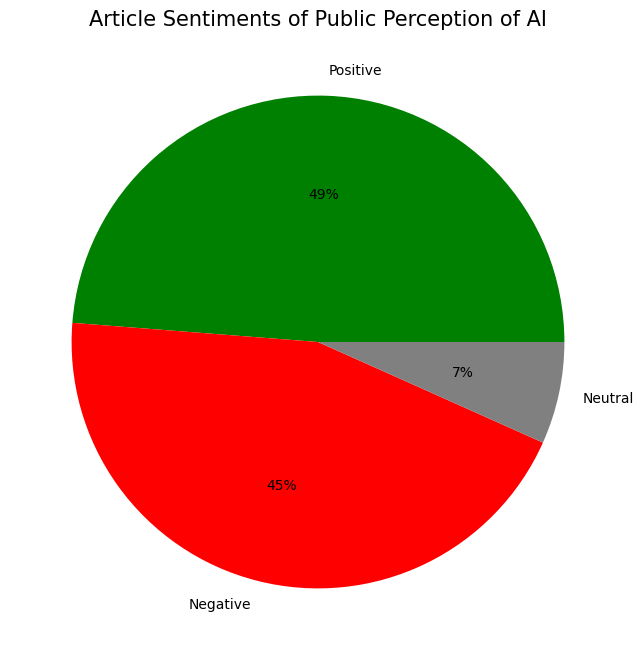

In [57]:
#Plotting a pie chart to show distribution of Sentiments

ax = sentiment_df.plot(kind='pie',figsize=(12,8), autopct='%1.0f%%', colors=['green', 'red', 'grey'])
fig = ax.get_figure()
ax.set_title('Article Sentiments of Public Perception of AI',fontsize=15);
# set y-axis label to be empty
ax.set_ylabel('')
# save plot in 'fig' folder
fig.savefig('fig/article-sentiment.png', bbox_inches='tight')

The general perception of writers about AI is 49% positive, 7% neutral and 45% negative. 

<a id='model'></a>
## Hypothesis testing and Modeling

One thing that we are more intimately curious about is which fears are increasing the fastest. It is easy to see that topics regarding AI are getting more prominent in the public eye, but which fears, exactly, do people worry about the most? If we were to project into the future, what issues are increasing the most relative to all the others? Another interesting piece of information is to see if any fears are strongly correlated. For example, we would hypothesize that Articles on the Singularity will have a strong correlation with Articles about work being affected by AI, since the singularity strongly implies almost any job being automated.

To do this, we will start by using some basic regression analysis just to see which categories of interest are increasing the most rapidly. We will be excluding the year 2016 in these algorithms, because it seems that there is a dip at 2016 due to the dataset being taken during 2016, meaning that there are only a partial year of articles. This leads to an artificial dip in the number of articles for all categories in 2016, so we will remove this year to assist the algorithms.

We will start by analyzing the number of articles related to each topic per year, so we start be creating a dataframe that stores all of the info we just graphed.

In [70]:
print(df_copy.columns)

Index(['Article Date', 'NYT section', 'AI Mood', 'AI Relevance', 'Fiction',
       'Controling AI (negative)', 'Cyborg (negative)', 'Ethics (negative)',
       'Military (negative)', 'Progress (negative)', 'Singularity (negative)',
       'Work (negative)', 'Cyborg (positive)', 'Decisions (positive)',
       'Education (positive)', 'Entertain (positive)', 'Healthcare (positive)',
       'Singularity (positive)', 'Transportation (positive)',
       'Work (positive)', 'Year'],
      dtype='object')


In [71]:
# remove 'Article Date' and 'NYT section' columns
df_copy = df_copy.drop(['Article Date', 'NYT section'], axis=1)
# df_copy.head()

In [72]:
# Here we go through and create a new analysis dataset that combines all of the data we just graphed into one dataset
analysis_df = pd.DataFrame(Cyborg)
analysis_df.columns = ["Cyborg"]

# Here we go through and add the columns one by one for each topic
analysis_df["Ethics"] = Ethics
analysis_df["Military"] = Military
analysis_df["Education"] = Education
analysis_df["Entertain"] = Entertain
analysis_df["Healthcare"] = Healthcare
analysis_df["Singularity"] = Singularity
analysis_df["Transportation"] = Transportation
analysis_df["Work"] = Work
# Here we group the data by year, but calculate the mean AI Mood, which is much more useful than the sum of AI Mood in all
# Articles for that year
df_year = df_copy.groupby(['Year']).mean()
Mood = df_year["AI Mood"]

analysis_df["AI Mood"] = Mood

# Here we drop the last row, which has the year 2016 which is incomplete
analysis_df = analysis_df.drop(analysis_df.index[-1])

Now we will do a polynomial regression for each topic, and then see what the derivative of each topic is at the year 2015, so we can see which topics are on the rise and which are getting less popular.

In [73]:
derivatives = []

topics = ["Cyborg", "Ethics", "Military", "Education", "Entertain", "Healthcare", "Singularity", "Transportation", "Work"]

# Here we just go through the topics one by one, doing a polynomial regression for each one and printing its derivative at
# 2015 to see the general trend in each topic
for i in topics:
    temp_coeff = np.polyfit(list(analysis_df.index), analysis_df[i], 3)
    temp_func = np.poly1d(temp_coeff)
    temp_deriv = temp_func.deriv()
    print("Derivative of " + i + " at 2015: " + str(temp_deriv(2015)))
    
    # Here we append the derivative to an array, which we will use later for normalizing the data
    derivatives.append(temp_deriv(2015))

Derivative of Cyborg at 2015: 1.8220026488106669
Derivative of Ethics at 2015: 1.5518092325655743
Derivative of Military at 2015: 0.4836941619078061
Derivative of Education at 2015: 0.3450254811978084
Derivative of Entertain at 2015: 0.9485430306431226
Derivative of Healthcare at 2015: 3.515033962979942
Derivative of Singularity at 2015: 1.4373038214362168
Derivative of Transportation at 2015: 0.904594666000321
Derivative of Work at 2015: 4.884076560500034


Now we will normalize these derivatives based on the average of the derivatives to account for the fact that discussions around AI are increasing in general. Then, we can get a z-score to see how much certain derivatives stand out.

In [74]:
mean = np.mean(derivatives)
sd = np.std(derivatives)

# Here we simply do the z-score calculation
derivatives = derivatives - mean * np.ones(9)
derivatives = derivatives / sd * np.ones(9)

# Here we simply print all of our new z-scores
print("z-score of Derivative of Cyborg at 2015: " + str(derivatives[0]))
print("z-score of Derivative of Ethics at 2015: " + str(derivatives[1]))
print("z-score of Derivative of Military at 2015: " + str(derivatives[2]))
print("z-score of Derivative of Education at 2015: " + str(derivatives[3]))
print("z-score of Derivative of Entertain at 2015: " + str(derivatives[4]))
print("z-score of Derivative of Healthcare at 2015: " + str(derivatives[5]))
print("z-score of Derivative of Singularity at 2015: " + str(derivatives[6]))
print("z-score of Derivative of Transportation  at 2015: " + str(derivatives[7]))
print("z-score of Derivative of Work at 2015: " + str(derivatives[8]))

z-score of Derivative of Cyborg at 2015: 0.03973683887659302
z-score of Derivative of Ethics at 2015: -0.15125347229205013
z-score of Derivative of Military at 2015: -0.9062667977233267
z-score of Derivative of Education at 2015: -1.0042868562658476
z-score of Derivative of Entertain at 2015: -0.577681329876042
z-score of Derivative of Healthcare at 2015: 1.236481681904646
z-score of Derivative of Singularity at 2015: -0.23219335752689851
z-score of Derivative of Transportation  at 2015: -0.608746897479909
z-score of Derivative of Work at 2015: 2.2042101903828355


So as we can see, one topic clearly stands out as statistically significant, Work. If we say that we want a standard deviation of 2 from the mean to consider a piece of data an outlier, then Work fits the bill. It's increase in articles per year has a z-score of 2.2042, which is a large outlier from all of the other data. This strongly implies that the increase in articles related to work is not due to chance, and is likely a real phenomenon, which in retrospect may be unsurprising. In a capitalistic society if you can't work then you can't survive, so people would naturally be worried about AI taking their jobs, even moreso with all the recent advancements in AI. There were a couple of other topics that were almost significant. Healthcare has a large increase, and Military and Education had a pretty large decrease. However, these z-scores were much closer to 0, and therefore it is harder to say they are significant.

Next, we will do some machine learning to figure out which topics predict a good or bad AI Mood. To do this, I will be using k-Nearest Neighbors classification, where we will use the presence of certain topics in articles to try to predict whether the AI Mood will be 1, 2, 3, 4 or 5.

We will start by creating an array called X which stores all of our features (i.e whether or not an article contains each of the previously indicated topics), and y which stores the AI Mood for each article.

In [75]:
# Here are the two arrays which will store all of our data for training. X stores the "inputs", y stores the "outputs" i.e 
# the AI Mood
X = []
y = []

# Here we define an array for each topic
Cyborg = df_copy["Cyborg (negative)"] + df_copy["Cyborg (positive)"]
Ethics = df_copy["Ethics (negative)"]
Military = df_copy["Military (negative)"]
Education = df_copy["Education (positive)"]
Entertain = df_copy["Entertain (positive)"]
Healthcare = df_copy["Healthcare (positive)"]
Singularity = df_copy["Singularity (negative)"] + df_copy["Singularity (positive)"]
Transportation = df_copy["Transportation (positive)"]
Progress = df_copy["Progress (negative)"]
Decisions = df_copy["Decisions (positive)"]
ControlingAI = df_copy["Controling AI (negative)"]
Work = df_copy["Work (negative)"] + df_copy["Work (positive)"]
Mood = df_copy["AI Mood"]

# Here we go through and populate X and y with all of the data from the topic arrays we just created
for i in range(0, len(Cyborg)):
    if i in Cyborg.index:
        X.append([Cyborg[i], Ethics[i], Military[i], Education[i], Entertain[i] , Healthcare[i], Singularity[i], Transportation[i],
                  Progress[i], Decisions[i], ControlingAI[i], Work[i]])
        y.append(Mood[i])

Next, we will convert X and y to dataframes in order to be able to normalise the x_train and x_test after performing train test split. Then we will rename the columns to the original as we're have created a list in the cell above. 

In [76]:
# Converting X to a Dataframe
X = pd.DataFrame(X)

In [77]:
# Renaming columns to the original names 
X.rename(columns={0:'Cyborg', 1:'Ethics', 2:'Military', 3:'Education', 4:'Entertain', 5:'Healthcare',
                 6:'Singularity', 7:'Transportation', 8:'Progress', 9:'Decisions', 10:'ControlingAI', 11:'Work'},
                    inplace=True)

In [78]:
X.head(1)

,Cyborg,Ethics,Military,Education,Entertain,Healthcare,Singularity,Transportation,Progress,Decisions,ControlingAI,Work
0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
# Converting y to a Dataframe
y =pd.DataFrame(y)

In [80]:
# Renaming columns to the original names
y.rename(columns={0:'AI Mood'},inplace=True)

Let's allocate 80% of the set for training (X_train, y_train) and 20% for the test set (X_test, y_test). The test set will not be involved in tuning the parameters of the models. We'll use it at the end, after tuning, to assess the quality of the resulting model. We would train different classifier models and select the best. Also we can perform ensembling technique.

In [81]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

#Define standard scaler
scaler = StandardScaler()

#transform train set
normalised_train_df = scaler.fit_transform(X_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = X_train.columns)

#transform test set
normalised_test_df = scaler.transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df,  columns = X_test.columns)

In [82]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

In [83]:
#Define Extra Trees Classifier model
extra_tree_clf = ExtraTreesClassifier()

#fit model
extra_tree_clf.fit(normalised_train_df, y_train)

#Predict model
pred = extra_tree_clf.predict(normalised_test_df)

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [84]:
#Let evaluate the accuracy score matrix
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred) 

0.7632107023411371

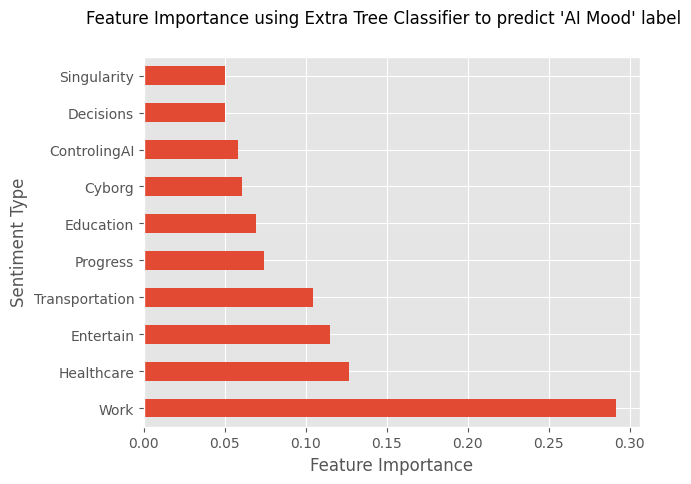

In [126]:
# plot results of Extra Trees Classifier model
# fig = plt.subplots(figsize=(12,8))
feat_importances = pd.Series(extra_tree_clf.feature_importances_, index=X_train.columns)
feat_importances_plot = feat_importances.nlargest(20).plot(kind='barh')
fig = feat_importances_plot.get_figure()
# set title to "Feature Importance using Extra Tree Classifier"
fig.suptitle("Feature Importance using Extra Tree Classifier to predict 'AI Mood' label")
# set x-axis title to "Feature Importance"
fig.axes[0].set_xlabel("Feature Importance")
# set y-axis label to "Feature Name"
fig.axes[0].set_ylabel("Sentiment Type")
# save plot in 'fig' folder
fig.savefig('fig/feature-importance-extra-tree.png', bbox_inches='tight')
# fig.set_title("Feature Importance using Extra Tree Classifier")
# plt.show()

### Feature Selection
Like most tree-based models, extra trees models have a nice property, which is that feature importance is computed during model training. Feature importance can be used as a feature selection method.

Let's find the feature importance using the ExtraTreesClassifier model. Which features are the least important and we drop them for the training

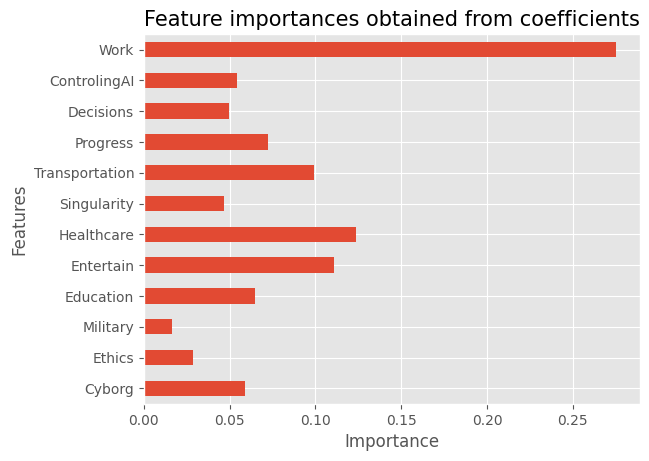

In [100]:
feature_importance = pd.Series(extra_tree_clf.feature_importances_, index = X.columns)
ax = feature_importance.plot(kind='barh')


ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature importances obtained from coefficients', size=15);

In [101]:
feature_importance

Cyborg            0.058767
Ethics            0.028431
Military          0.016268
Education         0.064878
Entertain         0.110718
Healthcare        0.123620
Singularity       0.046866
Transportation    0.098980
Progress          0.072397
Decisions         0.049398
ControlingAI      0.054274
Work              0.275403
dtype: float64

From the plot displayed above we can see that Military and Ethics have rather low importance.

We can consider dropping these features be dropped from the model because a simpler model tends to generalize well. To find out how a model with a reduced feature set compares with previous results, we will create training and test datasets for building the model using the reduced features.

In [102]:
# Create reduced feature set by dropping the columns
X.drop(['Military','Ethics'], axis =1, inplace=True)

In [103]:
# create new train and hold-out sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, we will create, fit and score the model

In [104]:
extra_tree_clf = ExtraTreesClassifier(random_state =1)
extra_tree_clf.fit(X_train_scaled, y_train)

#Predict model
pred = extra_tree_clf.predict(X_test_scaled)

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [105]:
#Let evaluate the accuracy score matrix

accuracy_score(y_test, pred) 

0.7625418060200669

These results are nearly the same as those obtained with the full feature set. In all likelihood, there is no significant difference. Given that a simpler model is more likely to generalize, this model is preferred.

Now using the ExtraTreesClassifier as our estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. Let's find the best hyperparameters from the randomized search CV

In [106]:
# Hyperparameter tuning for Extra trees classifier
#Define Extra Trees Classifier model
param = { 'n_estimators':[50, 100, 300, 500, 1000],
         'min_samples_leaf':[2, 4, 6, 8, 10],
         'max_features':['sqrt', 'log2', None],
         'min_samples_split':[2, 3, 5, 7, 9]}
search = RandomizedSearchCV(extra_tree_clf, param, n_iter=10, scoring='accuracy', n_jobs=-1, cv=10, random_state=1, verbose=1)
result = search.fit(X_train_scaled, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1

Best Score: 0.7572777488333531
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}


/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Next, let's train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV to see if the accuracy of the new optimal model is higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning.

In [107]:
# using the optimal model

#Define model
new_extra_clf = ExtraTreesClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 2, max_features = None, random_state=1)

#fit model
new_extra_clf.fit(X_train_scaled, y_train)

#Predict model
new_pred = new_extra_clf.predict(X_test_scaled)

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [108]:
# Evaluate the accuracy score matrix

accuracy_score(y_test, new_pred) 

0.7632107023411371

The new model slightly did better than the optimal model.

Next let's train decision tree and k-NN models. We do not know what parameters are good, so we will assume some random ones: a tree depth of 5 and the number of nearest neighbors equal 10.

In [109]:
from sklearn.model_selection import StratifiedKFold

# Define models
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=10)

# Fit models
tree.fit(X_train_scaled, y_train)

knn.fit(X_train_scaled, y_train)

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

Let's assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy).

In [110]:
# Evaluate the accuracy score matrix

tree_pred = tree.predict(X_test_scaled)
accuracy_score(y_test, tree_pred) 

0.7638795986622073

In [111]:
# Evaluate the accuracy score matrix

knn_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, knn_pred)

0.7464882943143812

The decision tree did better: the percentage of correct answers is about 76.4% (decision tree) versus 74.6% (k-NN). Note that this performance is achieved by using random parameters.


### Hyperparameter Tuning
Now, let's identify the parameters for the tree using cross-validation. We'll tune the maximum depth and the maximum number of features used at each split. Here is the essence of how the GridSearchCV works: for each unique pair of values of max_depth and max_features, compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [112]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(1, 11), "min_samples_split": range(3, 7), "max_features": range(4, 19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19),
                         'min_samples_split': range(3, 7)},
             verbose=True)

In [113]:
GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(3, 7), "max_features": range(4, 19)},
             verbose=True)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19),
                         'min_samples_split': range(3, 7)},
             verbose=True)

Let's list the best parameters and the corresponding mean accuracy from cross-validation.

In [114]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 6, 'min_samples_split': 5}

In [115]:
tree_grid.best_score_

0.7594506094233218

In [116]:
accuracy_score(y_test, tree_grid.predict(X_test_scaled))

0.7618729096989967

Now, let's tune the number of neighbors for k-NN:

In [117]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train_scaled, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/neighbors/_classif

({'knn__n_neighbors': 9}, 0.7512556499349297)

In [118]:
accuracy_score(y_test, knn_grid.predict(X_test_scaled)) 

0.7478260869565218

Here, the tree proved to be better than the nearest neighbors algorithm: 75.9%/76.2% accuracy for cross-validation and hold-out respectively.

Next let's train for the random forest model

In [119]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train_scaled, y_train, cv=5)))

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1

0.7587818530387205


In [120]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=1)

forest_grid.fit(X_train_scaled, y_train)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/base.py:1

({'max_depth': 10, 'max_features': 4}, 0.7586146289584529)

In [121]:
accuracy_score(y_test, forest_grid.predict(X_test_scaled))

0.7638795986622073

Decision trees perform very well, and even random forest (let's think of it for now as a bunch of trees that work better together) in this it cannot achieve much better performance (75.9%/76.4%) despite being trained for much longer.

### Ensemble modeling
####  Combining models

We chose a voting classifier to combine the predictions coming from the 3 classifiers.


In [122]:
from sklearn.ensemble import VotingClassifier


votingC = VotingClassifier(estimators=[('treec', tree_grid),
('rfc', forest_grid), ('etc',new_extra_clf),], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train_scaled, y_train)

/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wpm/.pyenv/versions/3.11.4/envs/venv-data/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [123]:
votingC.score(X_test_scaled, y_test)

0.7612040133779264

Let's check to see if there is one AI Mood category that is dominating the entire dataset, so lets calculate what proportion of the dataset are 1's, 2's, 3's, 4's and 5's.

In [124]:
total = 0
moods = [0, 0, 0, 0, 0]

# Here we just sum up the number of articles of each mood
for i in Mood:
    total += 1
    moods[i-1] += 1
    
print("Proportion of Moods that are 1: " + str(moods[0] / total))
print("Proportion of Moods that are 2: " + str(moods[1] / total))
print("Proportion of Moods that are 3: " + str(moods[2] / total))
print("Proportion of Moods that are 4: " + str(moods[3] / total))
print("Proportion of Moods that are 5: " + str(moods[4] / total))

Proportion of Moods that are 1: 0.008997147245995173
Proportion of Moods that are 2: 0.048935703313583497
Proportion of Moods that are 3: 0.7259161729207813
Proportion of Moods that are 4: 0.12080315997366689
Proportion of Moods that are 5: 0.09534781654597323


We can see that there is a somewhat dominant strategy for a potential Machine Learning Algorithm to simply choose 3 as the AI Mood for every single article, which would give it an accuracy of around 72.6%. If we look at our Voting classifier, it has an accuracy of around 76.3%, which means it is not simply using that dominant strategy, which is good. However, our accuracy still isn't very good. Why is this? One possibility is that our dataset simply isn't great for this kind of machine learning analysis. If we look at the dataset there are many articles that only have a single topic as a one, with all other topics being a 0. In fact, there are some articles that have a 0 for everything. We also, of course, have an overabundance of 3's in our model, which may also be hurting our algorithm, because the dataset doesn't have enough diversity. However, the fact that our accuracy is above the dominant strategy means that our algorithm is learning somewhat.